<a href="https://colab.research.google.com/github/tproffen/ORCSGirlsPython/blob/master/Fractals/Activity%201%20--%20Fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/tproffen/ORCSGirlsPython/blob/master/Images/PoweredTechGirlz.png?raw=1" width="10%" align="right" hpsace="50">

# Demo Activity: Fractals

Some tests and demos for the Fractal class activities.

In [ ]:
!curl -s -o setup.sh https://raw.githubusercontent.com/tproffen/ORCSGirlsPython/master/Fractals/Helpers/setup_activity1.sh
!bash setup.sh

Fetching needed files ..
Done


In [ ]:
from Helpers.helpers import *

In [ ]:
# Some useful default functions

def initTurtle():
  initializeTurtle(initial_window_size=(1000,600))

  bgcolor('#dddddd')
  color('red')
  width(1)
  hideturtle()
  liveoff()

def jump(sx,sy):
  penup()
  goto(sx, sy)
  pendown()
  face(0)

## Fractals - Kock Snowflake

Here is an example of a fractal - the Koch Snowflake. While the curves we have done so far are given by equations, these fractals are described by an algorithm and use *recursion* - in other words the function calls itself. More details are [here](https://python-with-science.readthedocs.io/en/latest/koch_fractal/koch_fractal.html) and much more detail is [here](http://paulbourke.net/fractals/fracintro/).

### Start with a line with a 'blip'


In [ ]:
initTurtle()
jump(50,400)

# straight line
forward(800)
show()

#back to beginning
jump(50,400)
color('blue')

# line with blip
forward(800/3)
left(60)
forward(800/3)
right(120)
forward(800/3)
left(60)
forward(800/3)

show()

### Keep making line segments into lines with blips

We define a function to make the line with blip we create above and rather than calling `forward`, we call the function again as many times as the parameter `order` specified. Calling a function from within itself is called **recursion**.

In [ ]:
# Blip line function

def blip_line(length, order):
  if(order==0):
    forward(length)
  else:
    blip_line(length/3, order-1)
    left(60)
    blip_line(length/3, order-1)
    right(120)
    blip_line(length/3, order-1)
    left(60)
    blip_line(length/3, order-1)

# Lets try

initTurtle()
jump(50,400)

blip_line(800,1) # our original line (order=1)

jump(50,400)
color('blue')
blip_line(800,2) # line with order 2

show()

# You can add higher orders here


### Now making it into a snowflake

This of making a triangle from lines. You move forward, turn 120 degrees, move forward three times. We do the same just with out new function `blip_line`.

In [ ]:
initTurtle()
jump(200,200)

length=300
order=4

for i in range(3):
  blip_line(length, order)
  right(120)

show()

# Change the order and run again

## Fractal tree

From [this article](https://towardsdatascience.com/creating-fractals-with-python-d2b663786da6).

In [ ]:
MINIMUM_BRANCH_LENGTH = 5

def build_tree(branch_length, shorten_by, angle):
  if branch_length > MINIMUM_BRANCH_LENGTH:
    forward(branch_length)
    new_length = branch_length - shorten_by
    left(angle)
    build_tree(new_length, shorten_by, angle)
    right(angle * 2)
    build_tree(new_length, shorten_by, angle)
    left(angle)
    backward(branch_length)

initTurtle()
jump(500,500)
face(270)

build_tree(80,8,25)
show()


## The Dragon Curve

Insipred by this [Wikipedia article](https://en.m.wikipedia.org/wiki/Dragon_curve). You can think of the way it is constructed by a sequence of 90 degree turns. First, each iteration is formed by taking the previous and adding alternating rights and lefts in between each letter.

*   R
*   **R**R**L**
*   **R**R**L**R**R**L**L**
*   **R**R**L**R**R**L**L**R**R**R**L**L**R**L**L**
*   ... 



In [ ]:
def dragon_curve_recursive(order, length, sign):
    if order == 0:
        forward(length)
    else:
        rootHalf = (1 / 2) ** (1 / 2)
        dragon_curve_recursive(order - 1, length * rootHalf, 1)
        right(sign * 90)
        dragon_curve_recursive(order - 1, length * rootHalf, -1)

initTurtle()
jump(300,400)

order=13                      # Try different orders here (between 0 and 12)
left(order*45)
dragon_curve_recursive(order, 500, 1)

show()

## Julia set

This is a different class where we check when an iteration *diverges* and use color on a 2D bitmap determined by how many iterations were needed. This example comes from [this article](https://www.geeksforgeeks.org/julia-fractal-python/).

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w, h, zoom = 1000,500,2
pix = np.zeros((h,w)) # Array filled with zeros

# setting up the variables according to the equation to create the fractal 
cX, cY = -0.7, 0.27015
moveX, moveY = 0.0, 0.0
maxIter = 255
   
for x in range(w): 
  for y in range(h): 
     zx = 1.5*(x - w/2)/(0.5*zoom*w) + moveX 
     zy = 1.0*(y - h/2)/(0.5*zoom*h) + moveY 
     i = maxIter 
     while zx*zx + zy*zy < 4 and i > 1: 
       tmp = zx*zx - zy*zy + cX 
       zy,zx = 2.0*zx*zy + cY, tmp 
       i -= 1

     pix[y,x] = i

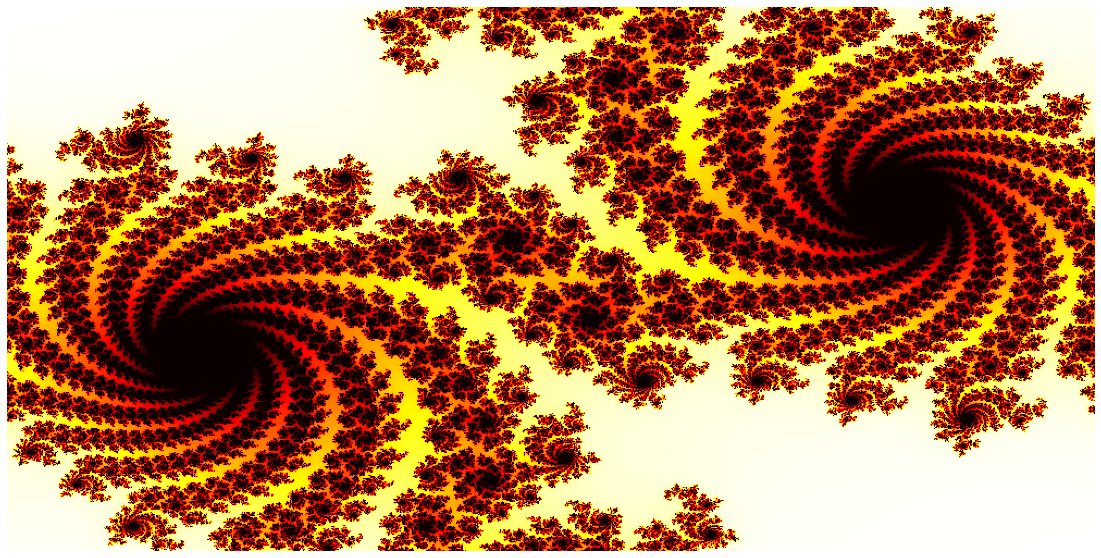

In [47]:
# Plotting in new cell, so we do not need to recalculate when chaning color maps
plt.rcParams['figure.figsize'] = [20, 10]
plt.axis('off')
plt.imshow(pix, cmap="hot")